# Load libraries & helper functions

In [1]:
%matplotlib inline
from helpers import *

# Declare parameters

In [ ]:
config.DATADIR      = '/home/duboisjx/mnt10/LabUsers/duboisjx/data/PreImplant/MRI'
# fMRI runs
config.fmriRun      = 'movie_1'

# use volume or surface data
config.isCifti      = False

config.overwrite    = False

config.pipelineName = 'Finn'
# use ICA-FIX input
config.useFIX       = False
config.preWhitening = False
config.Operations   = config.operationDict[config.pipelineName]

# submit jobs with sge
config.queue        = False
# make sure to set memory requirements according to data size
config.maxvmem      = '5G'

# parcellation for FC matrix
config.parcellationName = 'shen2013'
config.parcellationFile = '/home/duboisjx/mnt10/LabUsers/duboisjx/data/parcellations/shenetal_neuroimage2013_new/shen_2.5mm_268_parcellation.nii.gz'
config.nParcels         = 268

subjects  = ['P41CS','P42CS','P43CS','P44CS','P45CS','P46CS']

# Do work

/home/duboisjx/vault/data/PreImplant/MRI/P41CS/MNINonLinear/Results/movie_1/movie_1_prepro_dGS7Y1BY.nii.gz
/home/duboisjx/vault/data/PreImplant/MRI/P42CS/MNINonLinear/Results/movie_1/movie_1_prepro_jZCd64rf.nii.gz
/home/duboisjx/vault/data/PreImplant/MRI/P43CS/MNINonLinear/Results/movie_1/movie_1_prepro_BOWYwa5X.nii.gz
/home/duboisjx/vault/data/PreImplant/MRI/P44CS/MNINonLinear/Results/movie_1/movie_1_prepro_osC1ZHCI.nii.gz
/home/duboisjx/vault/data/PreImplant/MRI/P45CS/MNINonLinear/Results/movie_1/movie_1_prepro_G7DrDr9o.nii.gz
/home/duboisjx/vault/data/PreImplant/MRI/P46CS/MNINonLinear/Results/movie_1/movie_1_prepro_1w5RzafQ.nii.gz


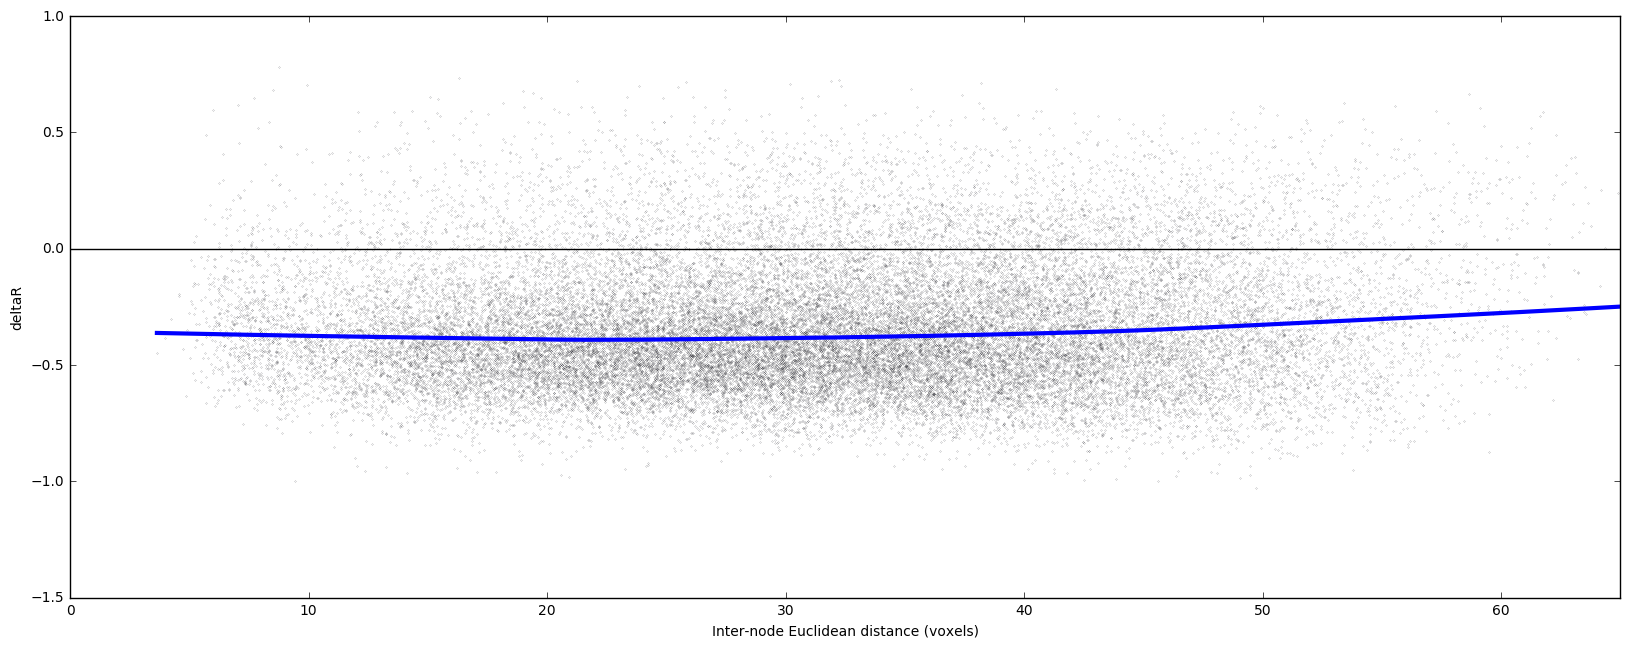

In [2]:
fdScores  = np.zeros((len(subjects)),dtype=np.float32)
fcMats    = np.zeros((config.nParcels,config.nParcels,len(subjects)),dtype=np.float32)
fcMats_dn = np.zeros((config.nParcels,config.nParcels,len(subjects)),dtype=np.float32)
i=0
plotEachSubject=False
for config.subject in subjects:
    runPipelinePar()
    if plotEachSubject:
        makeGrayPlot() # overwrite 
    fcMats[:,:,i],fcMats_dn[:,:,i] = plotFC(plotEachSubject)
    fdScores[i]=np.mean(computeFD())
    i = i + 1
    
# rsFC/mean FD plot
# since this is a correlation across subjects, it makes most sense if we have enough subjects
if len(subjects)>20:    
    plotQCrsFC(fcMats,fcMats_dn,fdScores)
    
# deltaR plot
plotDeltaR(fcMats,fcMats_dn)
